In [1]:
"""
Script to Explore Training Dataset
"""
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib
from matplotlib import patches
from utils import utils
import dataframe_image as dfi
from PIL import Image
from collections import defaultdict
# np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
font = {'family' : 'Ubuntu',
        'size'   : 22}
matplotlib.rc('font', **font)
import json
from datetime import datetime
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
 

pd.set_option('display.max_rows', 2000)
# EXP_TYPES = ['ASSEMBLESANDWICH', 'GETPLATE', 'OPENFREEZER', 'OPENFRIDGE', 'SLICETOMATO', 'WASHHANDS']
# ACTION_PERIOD = ['grab something', ]
tagId = "0x683f"
regions_fp = Path().joinpath("outputs", "REGIONS", "2023-03-14 12:15:31.794149.json")
data_fp = Path().joinpath("outputs", "TRAINING", "2023-05-10 15:27:33.336031_W3_S1_training.csv")
# wild_fp = Path().joinpath("outputs", "TRAINING", "2023-04-03 11:53:01.922254_W2_S1_wild_training.csv")
data = pd.read_csv(data_fp)
# wild_data = pd.read_csv(wild_fp)
# Include wild in training?
# data = pd.concat([data, wild_data], axis=0)

# Feature Selection
# data.loc[:,]
feature_list = ['ACTIVITY','LOCATION', 'Peaks_Acc_X', 'Peaks_Acc_Y', 'Peaks_Acc_Z',  ]
feature_list += data.columns[data.columns.str.contains('POS')].tolist()
feature_list += data.columns[data.columns.str.contains('_ACC')].tolist()
data = data.loc[:, feature_list ]
# print(feature_list)
# drop_ind = data.query("((ACTIVITY == 'GETPLATE') and ((LOCATION == 'kitchen_sink') or (LOCATION == 'counter')))").index
# data = data.drop(drop_ind, axis=0)
# data.query("ACTIVITY == 'GETPLATE'")



In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm, tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# MARK: - Preprocessing

output_dir = Path().joinpath('outputs', 'MODELS', f'{datetime.now()}')
output_dir.mkdir(parents=True, exist_ok=True)


# Make the encoders
locations = np.reshape(data['LOCATION'].values, (-1, 1))
loc_enc = OneHotEncoder(handle_unknown='ignore')
loc_enc.fit(locations)
joblib.dump(loc_enc, output_dir.joinpath('location_encoder.joblib'))

cleaned_data = (data
                .loc[data.loc[:, 'ACTIVITY'] != "ASSEMBLESANDWICH", :] # Removes assemblesandiwch activity
                # .loc[data.loc[:, 'ACTIVITY'] != "UNDEFINED", :] # Removes undefined activity
                .dropna()
                .reset_index(drop=True)
                .pipe(utils.one_hot_encode_col, 'LOCATION', loc_enc)
                .pipe(utils.drop_columns_that_contain, 'Pressure')
            )

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(cleaned_data['ACTIVITY'].values)
cleaned_data['ACTIVITY'] = encoded_y
joblib.dump(label_encoder, output_dir.joinpath('label_encoder.joblib'))

##################################################
#               MODEL SELECTION

clf = svm.SVC(kernel='linear', C=10) # SVM
# clf = svm.SVC(kernel='poly', degree=3, gamma='scale', C=10) # SVM
# clf = svm.SVC(kernel='rbf', gamma=1000, C=100) # SVM
# clf = tree.DecisionTreeClassifier(random_state=0) # Decision Tree
##################################################

X = cleaned_data.drop('ACTIVITY', axis=1).values
y = cleaned_data.loc[:, 'ACTIVITY'].values

print("Data Shape: ", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0
)

clf.fit(X_train, y_train)
joblib.dump(clf, output_dir.joinpath('output_model.joblib'))


Data Shape:  (5552, 46) (5552,)


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

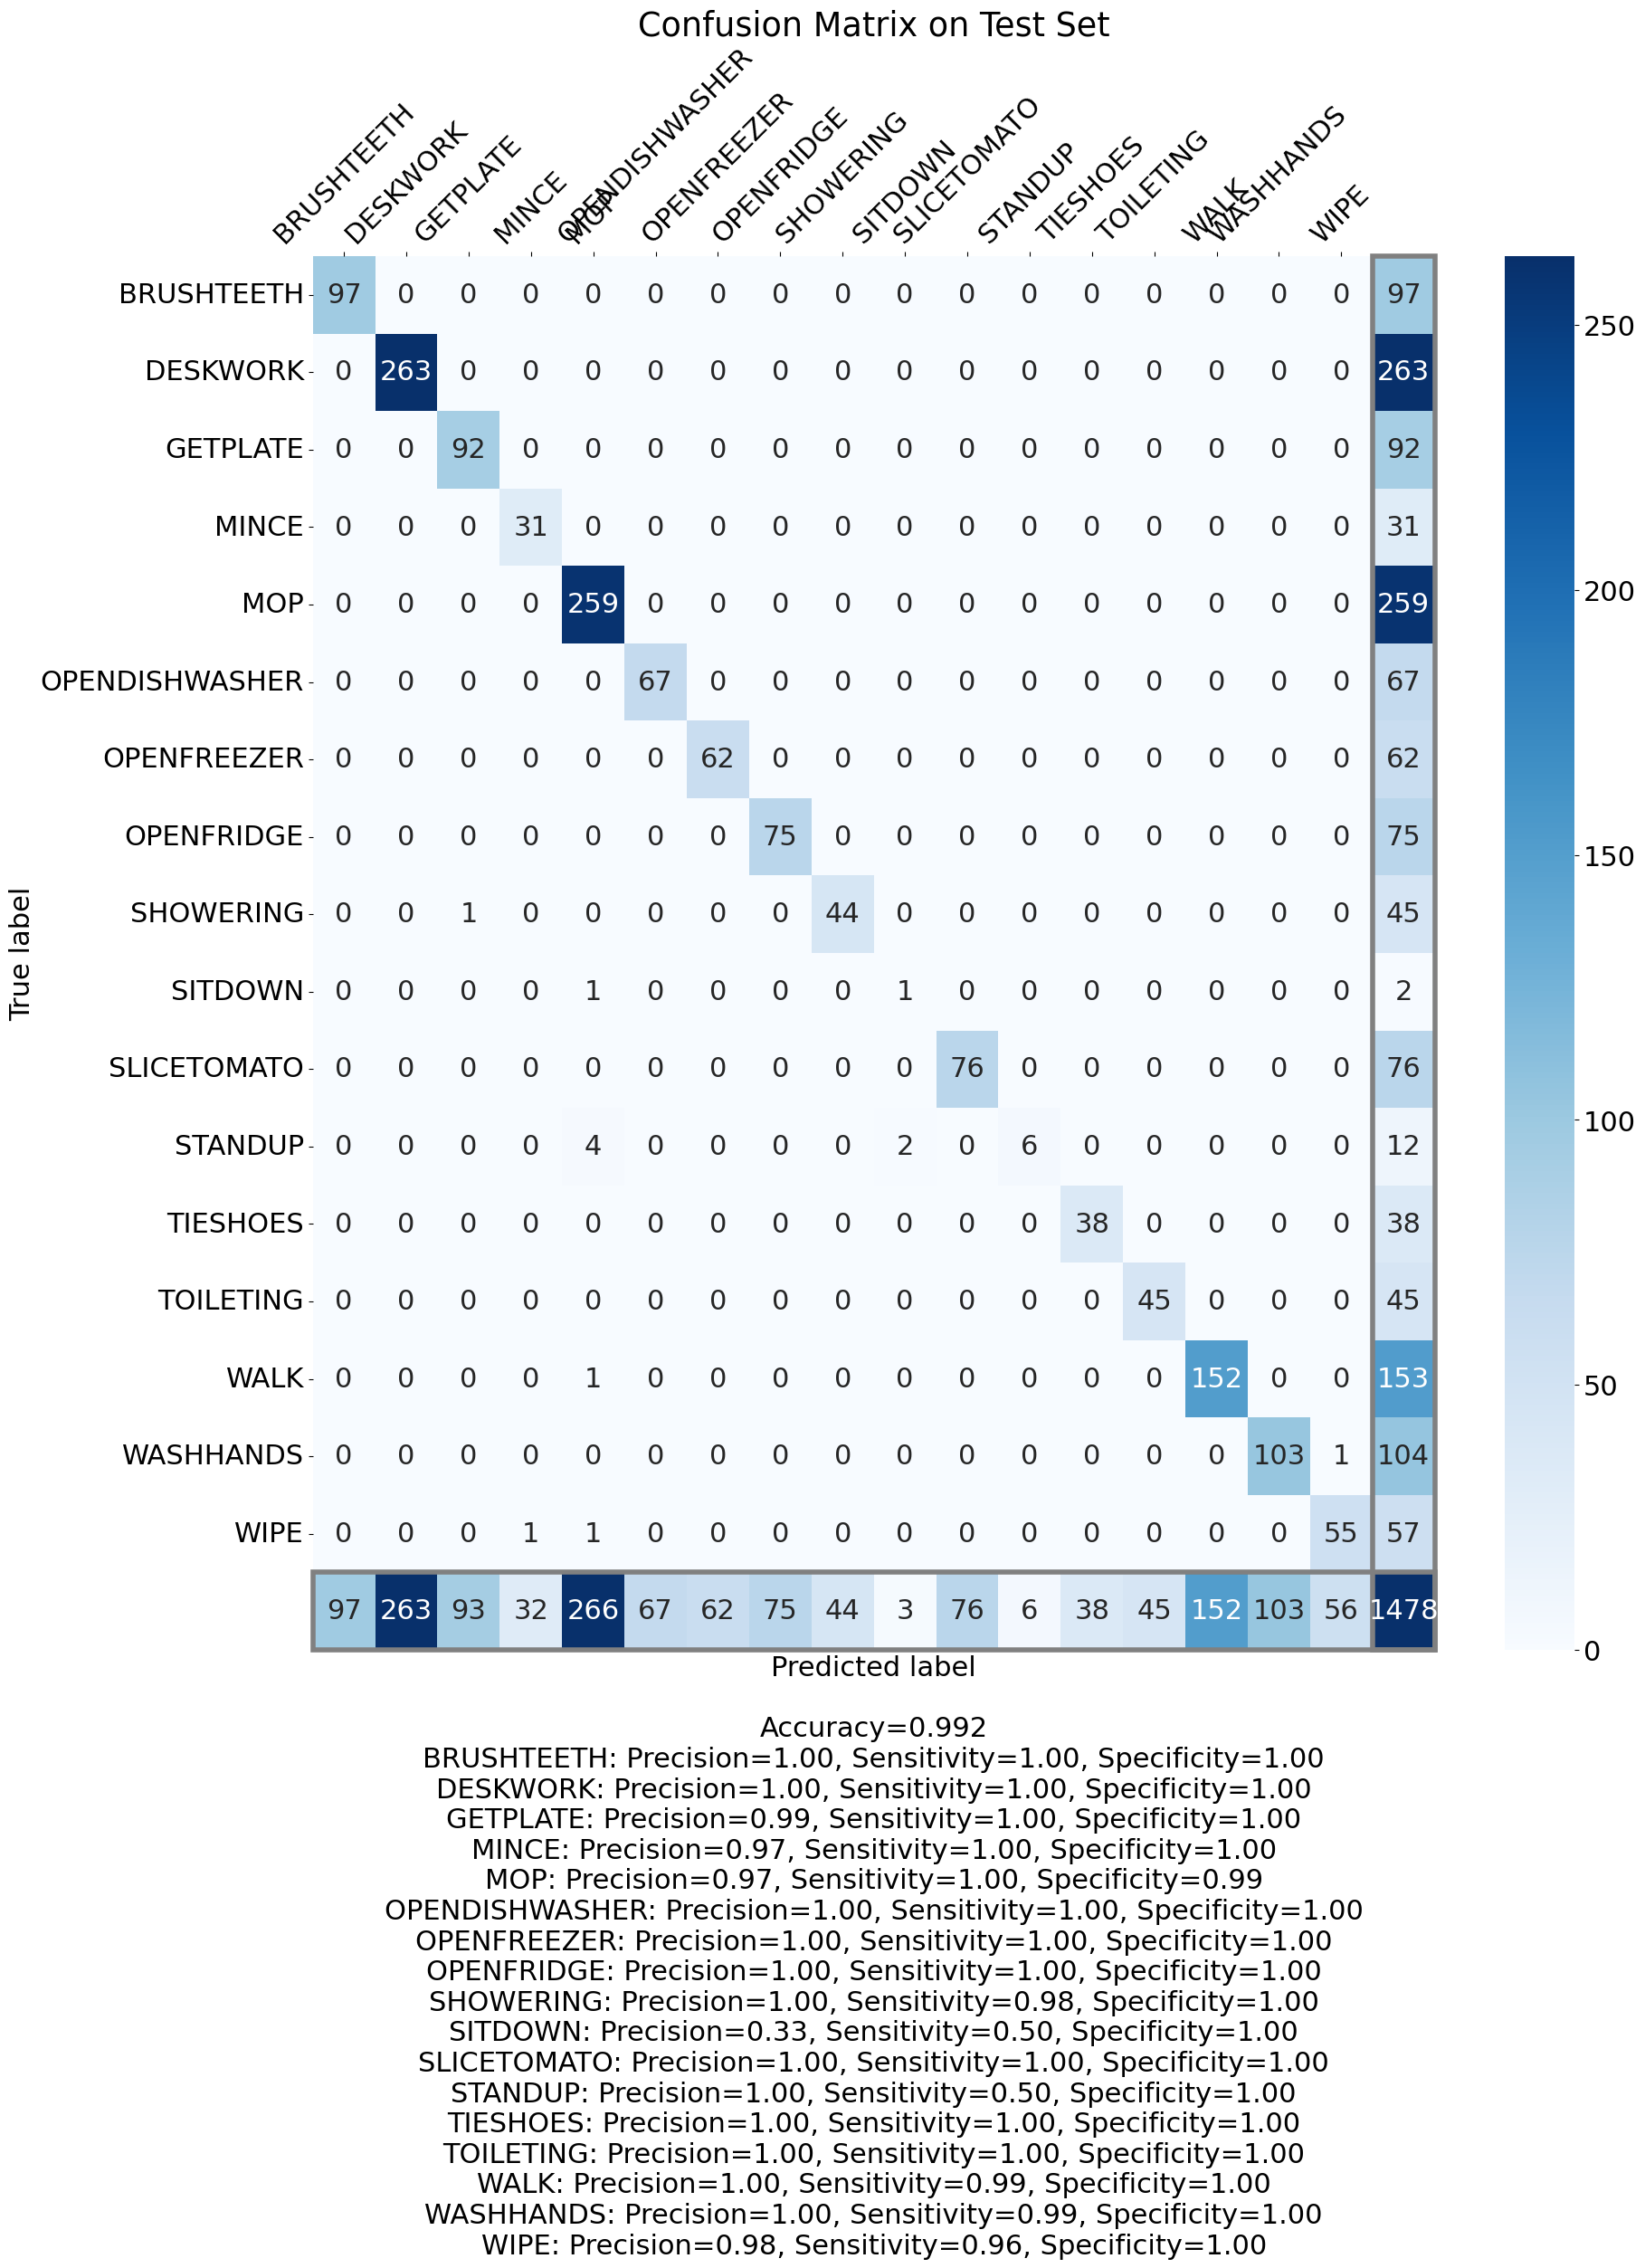

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

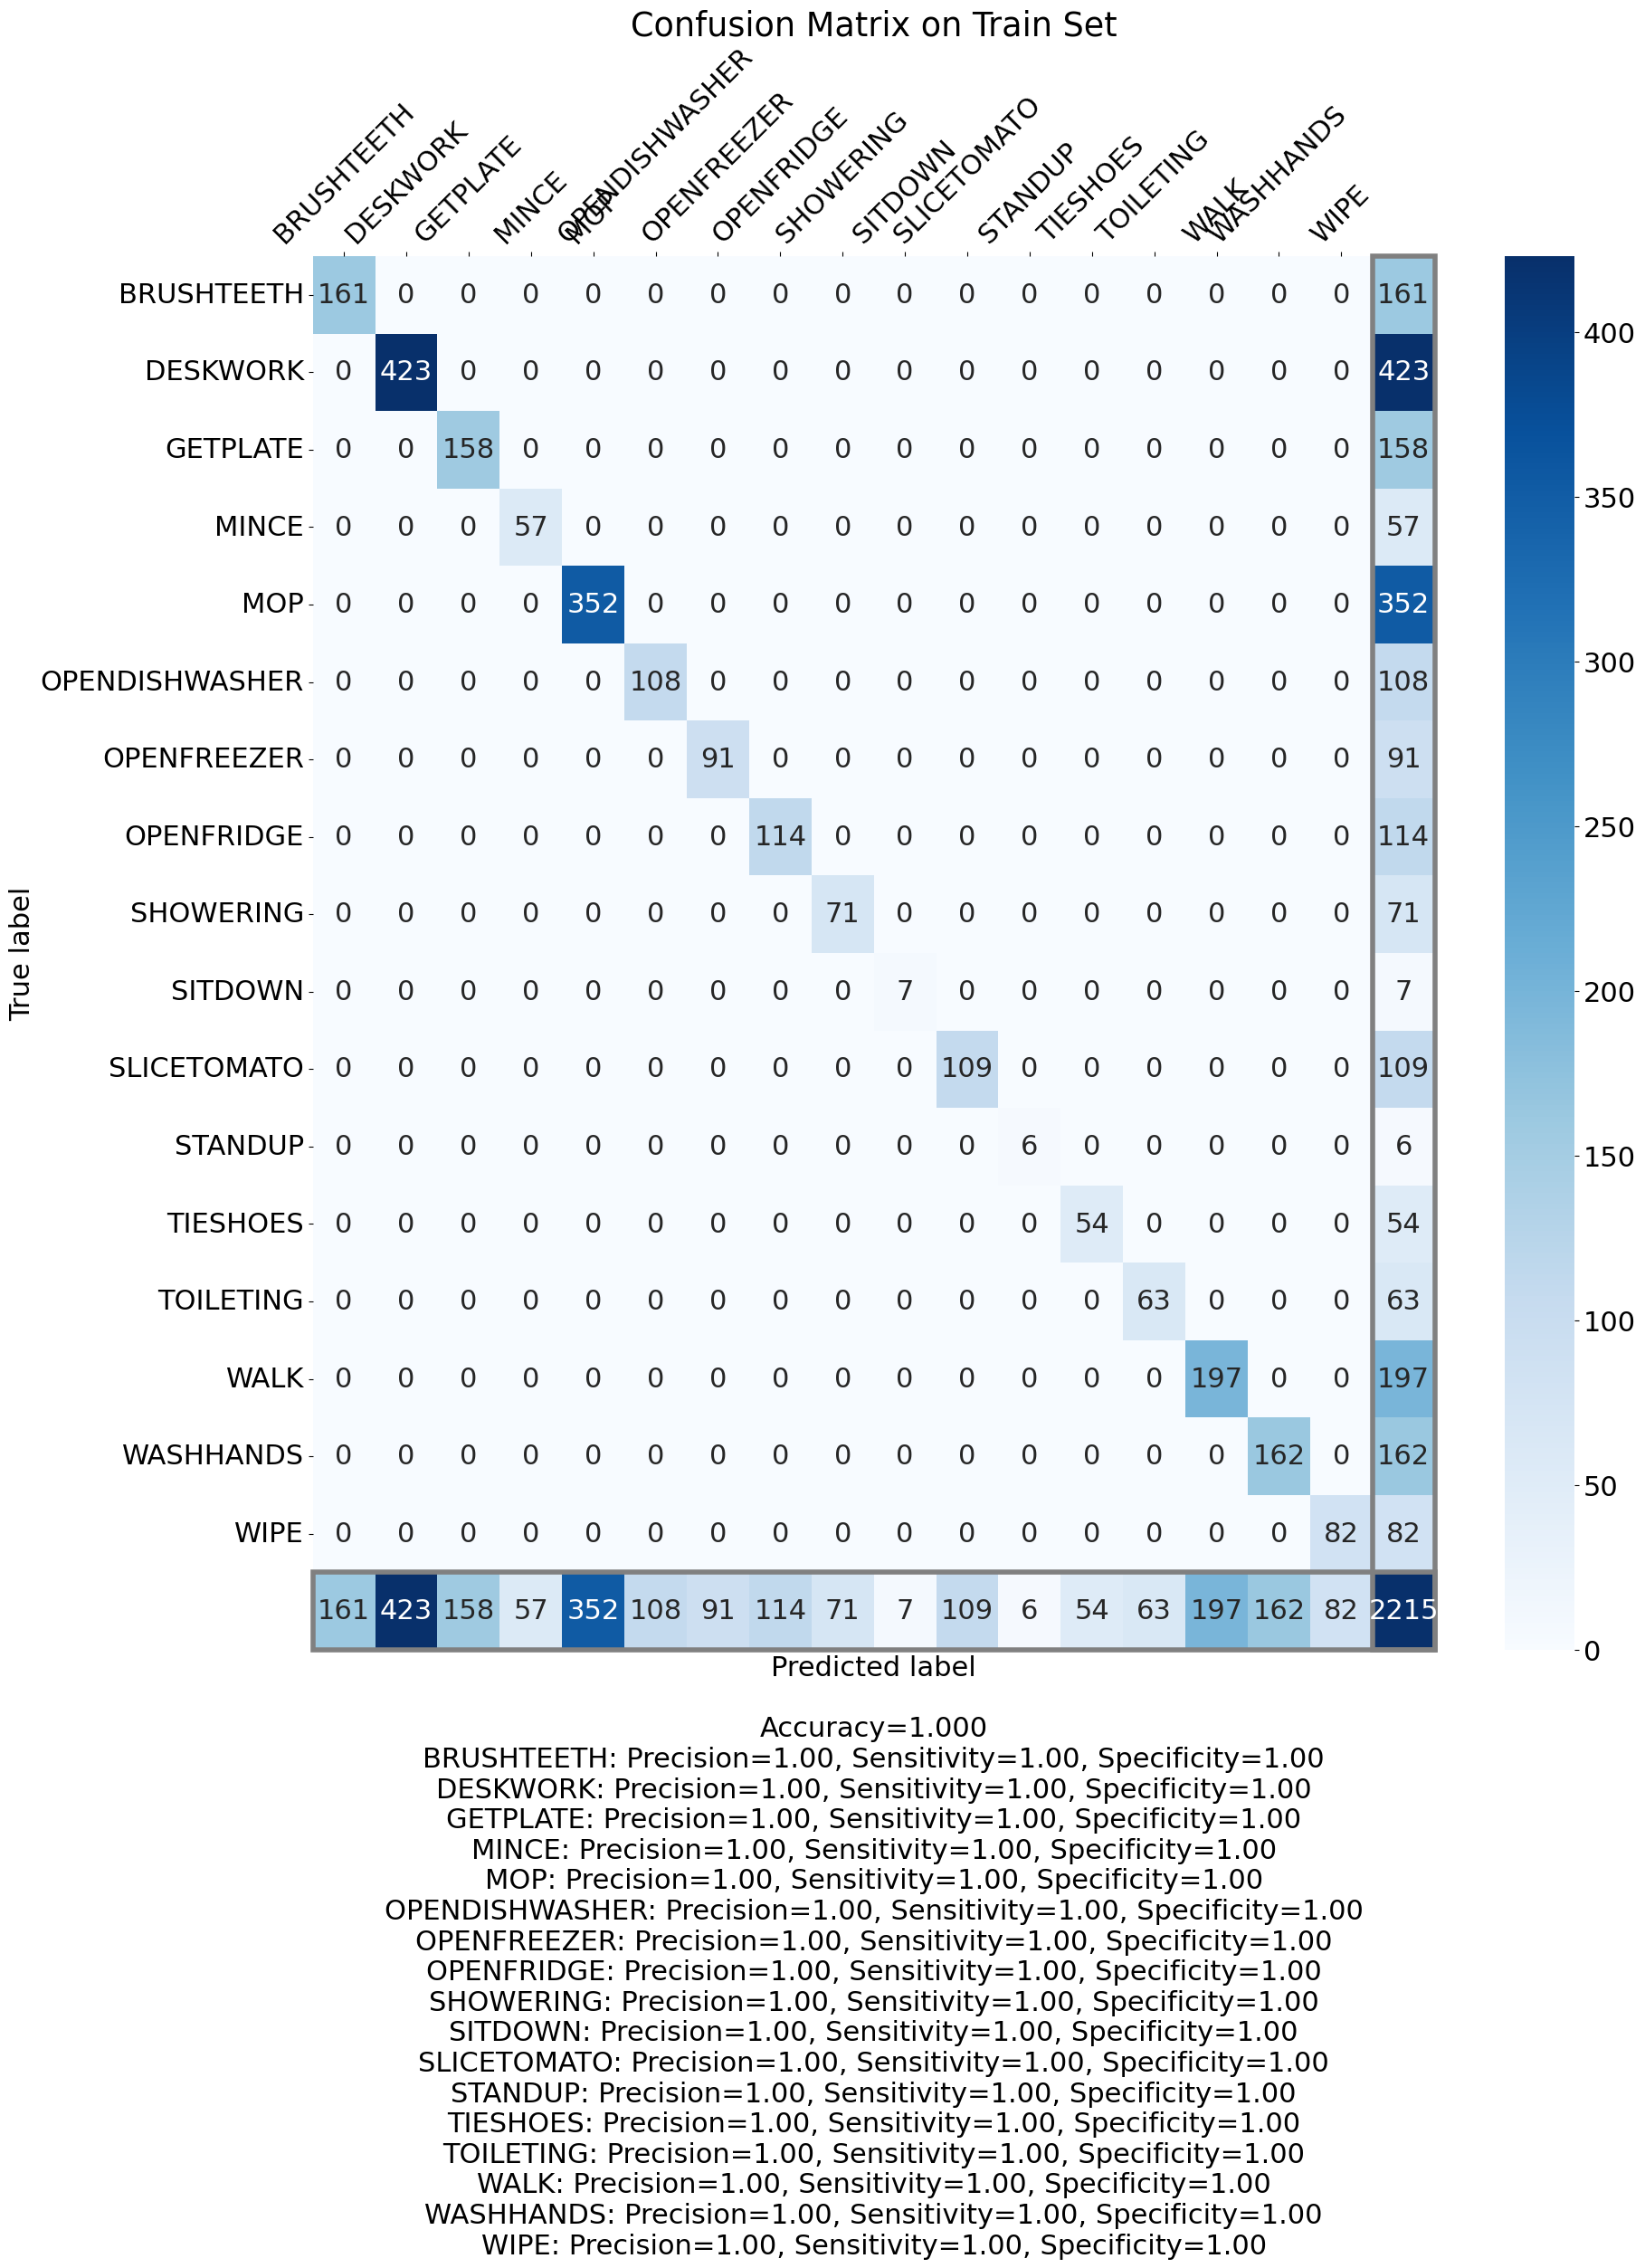

In [ ]:
# MARK: - VISUALIZATION

categories = label_encoder.classes_

y_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Test Set")

y_pred = clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred) 
utils.make_confusion_matrix(cf_matrix, categories=categories, figsize=(20,20), percent=False, title="Confusion Matrix on Train Set")


# # Plot the tree *** Only for the tree classifier
# plt.figure(figsize=(100,100))
# tree.plot_tree(clf, class_names=categories, feature_names=cleaned_data.drop('ACTIVITY', axis=1).columns)


In [4]:
# Cross Validation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score, accuracy_score

# k = 5
# kf = StratifiedKFold(n_splits=k, random_state=0, shuffle=True)
# cross_clf = svm.SVC(kernel='linear', C=10)

# accuracy = []

# for train_ind, test_ind in kf.split(X, y):
#     X_train, X_test = X[train_ind], X[test_ind]
#     y_train, y_test = y[train_ind], y[test_ind]

#     print("Shape X_train: ", X_train.shape, " Shape X_test: ", X_test.shape)
#     cross_clf.fit(X_train, y_train)
#     y_pred = cross_clf.predict(X_test)

#     accuracy.append(accuracy_score(y_pred, y_test))

# print(accuracy)

